In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
from matplotlib.pyplot import figure
import json
import requests
import time

#Fred Key
from config import fred_api

# 25 - Year Prime and Mortgage Rates from FRED API

In [2]:
#settings for 25 year Prime Rate API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MPRIME",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"1998-02-01",
    "observation_end":"2023-02-01",
}

In [3]:
#make the request
response=requests.get((base_url+request_type),params=params)
print(response.url)
MPRIME_25_data=response.json()
#display the response
print(json.dumps(MPRIME_25_data, indent=4, sort_keys=True))

https://api.stlouisfed.org/fred/series/observations?series_id=MPRIME&api_key=32726d0b80a7994a8c204d4e4fd39c82&file_type=json&observation_start=1998-02-01&observation_end=2023-02-01
{
    "count": 301,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "1998-02-01",
    "observations": [
        {
            "date": "1998-02-01",
            "realtime_end": "2023-04-05",
            "realtime_start": "2023-04-05",
            "value": "8.50"
        },
        {
            "date": "1998-03-01",
            "realtime_end": "2023-04-05",
            "realtime_start": "2023-04-05",
            "value": "8.50"
        },
        {
            "date": "1998-04-01",
            "realtime_end": "2023-04-05",
            "realtime_start": "2023-04-05",
            "value": "8.50"
        },
        {
            "date": "1998-05-01",
            "realtime_end": "2023-04-05",
            "realtime_start": "2023-04-05",
            "value

In [ ]:
#get the list of observations
prime_25_points=MPRIME_25_data["observations"]

In [ ]:
#process the list of observations, extracting the date and rate value
prime_25_date=[]
prime_25_rate=[]
for point in prime_25_points:
    prime_25_date.append(point["date"])
    prime_25_rate.append(point["value"])

In [ ]:
#create a DataFrame to store the Lists
#vertically oriented 
_25year_df=pd.DataFrame(
    {"Dates":prime_25_date,
    "Prime Rate":prime_25_rate})
_25year_df.set_index(["Dates"], inplace=True)
_25year_df.head()

,Prime Rate
Dates,
1998-02-01,8.50
1998-03-01,8.50
1998-04-01,8.50
1998-05-01,8.50
1998-06-01,8.50


In [ ]:
#settings for 25 years of 30-year mortgage API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MORTGAGE30US",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"1998-02-01",
    "observation_end":"2023-02-01",
    "frequency":"m",
    "aggregation_method":"avg"
}

In [ ]:
#make the request
response=requests.get((base_url+request_type),params=params)
M30_25_data=response.json()
#display the response
print(json.dumps(M30_25_data, indent=4, sort_keys=True))

{
    "count": 301,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "1998-02-01",
    "observations": [
        {
            "date": "1998-02-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "7.04"
        },
        {
            "date": "1998-03-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "7.13"
        },
        {
            "date": "1998-04-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "7.14"
        },
        {
            "date": "1998-05-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "7.14"
        },
        {
            "date": "1998-06-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "7.00"
  

In [ ]:
#get the list of observations
M30_25_points=M30_25_data["observations"]

In [ ]:
#process the list of observations, extracting the rate value
M30_25_rates=[]
for point in M30_25_points:
    M30_25_rates.append(point["value"])

In [ ]:
#Add 30-yr Mortgage rates to 25 year DF
_25year_df["30-Yr Mortgage Rate"]=M30_25_rates
_25year_df.head()

,Prime Rate,30-Yr Mortgage Rate
Dates,,
1998-02-01,8.50,7.04
1998-03-01,8.50,7.13
1998-04-01,8.50,7.14
1998-05-01,8.50,7.14
1998-06-01,8.50,7.00


# 5 - Year Prime and Mortgage Rates From FRED API

In [ ]:
#settings for Prime Rate API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MPRIME",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
}

In [ ]:
#make the request
response=requests.get((base_url+request_type),params=params)
MPRIME_data=response.json()
#display the response
print(json.dumps(MPRIME_data, indent=4, sort_keys=True))

{
    "count": 54,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "2018-09-01",
    "observations": [
        {
            "date": "2018-09-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "5.03"
        },
        {
            "date": "2018-10-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "5.25"
        },
        {
            "date": "2018-11-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "5.25"
        },
        {
            "date": "2018-12-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "5.35"
        },
        {
            "date": "2019-01-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "5.50"
   

In [ ]:
#get the list of observations
prime_points=MPRIME_data["observations"]

In [ ]:
#process the list of observations, extracting the date and rate value
prime_date=[]
prime_rate=[]
for point in prime_points:
    prime_date.append(point["date"])
    prime_rate.append(point["value"])

In [ ]:
#create DataFrames to store the Lists
#vertically oriented 
prime_virt_df=pd.DataFrame(
    {"Dates":prime_date,
    "Prime Rate":prime_rate})
prime_virt_df.set_index(["Dates"], inplace=True)
prime_virt_df.head()

,Prime Rate
Dates,
2018-09-01,5.03
2018-10-01,5.25
2018-11-01,5.25
2018-12-01,5.35
2019-01-01,5.50


In [ ]:
#horizontally oriented
prime_horz_df=pd.DataFrame([prime_rate])
prime_horz_df.columns=prime_date
prime_horz_df.index=["Prime Rate"]
prime_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
Prime Rate,5.03,5.25,5.25,5.35,5.50,5.50,5.50,5.50,5.50,5.50,...,3.94,4.38,4.85,5.50,5.73,6.25,6.95,7.27,7.50,7.74


In [ ]:
#settings for 30 year mortgage API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MORTGAGE30US",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
    "frequency":"m",
    "aggregation_method":"avg"
}

In [ ]:
#make the request
response=requests.get((base_url+request_type),params=params)
M30_data=response.json()
#display the response
print(json.dumps(M30_data, indent=4, sort_keys=True))

{
    "count": 54,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "2018-09-01",
    "observations": [
        {
            "date": "2018-09-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "4.63"
        },
        {
            "date": "2018-10-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "4.83"
        },
        {
            "date": "2018-11-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "4.87"
        },
        {
            "date": "2018-12-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "4.64"
        },
        {
            "date": "2019-01-01",
            "realtime_end": "2023-04-04",
            "realtime_start": "2023-04-04",
            "value": "4.46"
   

In [ ]:
#get the list of observations
M30_points=M30_data["observations"]

In [ ]:
#process the list of observations, extracting the date and rate value
M30_dates=[]
M30_rates=[]
for point in M30_points:
    M30_dates.append(point["date"])
    M30_rates.append(point["value"])

In [ ]:
#create DataFrames to store the Lists
#vertically oriented 
M30_virt_df=pd.DataFrame(
    {"Dates":M30_dates,
    "30-Yr Mortgage Rate":M30_rates})
M30_virt_df.set_index(["Dates"], inplace=True)
M30_virt_df.head()

,30-Yr Mortgage Rate
Dates,
2018-09-01,4.63
2018-10-01,4.83
2018-11-01,4.87
2018-12-01,4.64
2019-01-01,4.46


In [ ]:
#horizontally oriented
M30_horz_df=pd.DataFrame([M30_rates])
M30_horz_df.columns=M30_dates
M30_horz_df.index=["30-Yr Mortgage Rate"]
M30_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
30-Yr Mortgage Rate,4.63,4.83,4.87,4.64,4.46,4.37,4.27,4.14,4.07,3.80,...,5.23,5.52,5.41,5.22,6.11,6.90,6.81,6.36,6.27,6.26


# Read In Cleaned Zillow CSVs

In [ ]:
# Read in cleaned Median List Price csv from group data folder
median_list_to_load = 'data/lr_cleaned_mlp.csv'
lr_median_list_price = pd.read_csv(median_list_to_load)
lr_median_list_price.head()

,SizeRank,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,0,United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
1,1,"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
2,2,"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
3,3,"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
4,4,"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [11]:
# Read in cleaned Median Sales Price csv from group data folder
sales_price_to_load = 'data/cp_median_sale_price_cleaned.csv'
cp_median_sales_price = pd.read_csv(sales_price_to_load)
cp_median_sales_price.head()

,RegionName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


In [12]:
#CHELSEA clean data to match other csv file
median_sale_price_cleaned_25 = cp_median_sales_price.loc[(cp_median_sales_price.index<26),:]
cp_median_sale_price_cleaned = median_sale_price_cleaned_25.set_index('RegionName') 
cp_median_sale_price_cleaned

,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,244478.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,400485.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,629119.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,235628.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,261591.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177
"Houston, TX",221270.0,220449.0,220679.0,221628.0,222783.0,222752.0,224113.0,225808.0,227081.0,229079.0,...,323493.0,329674.0,334747.0,336019.0,330946.0,327666.0,323361.0,320765.0,315651.0,313690
"Washington, DC",385264.0,384470.0,385907.0,386526.0,390446.0,393540.0,396652.0,399836.0,399924.0,398081.0,...,492196.0,506356.0,511189.0,506821.0,499513.0,493312.0,491595.0,491614.0,484960.0,477182
"Miami, FL",262640.0,262100.0,265882.0,269781.0,271295.0,271013.0,270494.0,275337.0,277490.0,277690.0,...,397800.0,406140.0,411027.0,414376.0,412037.0,411279.0,414988.0,416303.0,417066.0,416790
"Philadelphia, PA",228012.0,228818.0,229154.0,230828.0,231552.0,234055.0,233877.0,237063.0,238637.0,240171.0,...,297838.0,304701.0,314598.0,320271.0,319425.0,318140.0,317783.0,317197.0,317316.0,316064


In [13]:
# Read in cleaned Median Inventory csv from group data folder
inventory_to_load = 'bens_analysis/Top 25 For Sale Inventory.csv'
bc_inventory = pd.read_csv(inventory_to_load)
bc_inventory.head()

,SizeRank,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,0,United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
1,1,"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
2,2,"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
3,3,"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
4,4,"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0


In [17]:
#CHELSEA clean data to match other csv file
bc_inventory = bc_inventory.drop(columns= ['SizeRank'])
bc_inventory_cleaned = bc_inventory.set_index('RegionName') 
bc_inventory_cleaned

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,1515570.0,1604227.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,91255.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,30124.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,48113.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,32932.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0
"Houston, TX",32911.0,32423.0,31475.0,30059.0,28517.0,27451.0,27492.0,29072.0,30727.0,32388.0,...,17175.0,18420.0,19852.0,21624.0,23069.0,23666.0,23545.0,22815.0,21748.0,20780.0
"Washington, DC",23728.0,23421.0,23196.0,22306.0,20022.0,17421.0,15899.0,16978.0,19236.0,21772.0,...,12831.0,14873.0,16216.0,16871.0,16758.0,16432.0,15801.0,14799.0,12889.0,11090.0
"Miami, FL",50432.0,49919.0,50254.0,50709.0,51011.0,52285.0,54550.0,57816.0,59250.0,59411.0,...,25059.0,25474.0,26465.0,28557.0,30756.0,31767.0,32323.0,32290.0,32528.0,33272.0
"Philadelphia, PA",28691.0,27833.0,27618.0,26984.0,25501.0,23875.0,22874.0,23683.0,25202.0,26821.0,...,13406.0,14796.0,15876.0,16533.0,16721.0,16359.0,16002.0,15231.0,13911.0,12593.0


In [ ]:
# Read in cleaned Median Days Pending csv from group data folder
days_pending_to_load = 'Peter/3_30 Class/Top 25 Median Days Pending.csv'
ps_days_pending = pd.read_csv(days_pending_to_load)
ps_days_pending.head()

,Median Days Pending SizeRank,Median Days Pending RegionName,Median Days Pending 8/31/2018,Median Days Pending 9/30/2018,Median Days Pending 10/31/2018,Median Days Pending 11/30/2018,Median Days Pending 12/31/2018,Median Days Pending 1/31/2019,Median Days Pending 2/28/2019,Median Days Pending 3/31/2019,...,Median Days Pending 4/30/2022,Median Days Pending 5/31/2022,Median Days Pending 6/30/2022,Median Days Pending 7/31/2022,Median Days Pending 8/31/2022,Median Days Pending 9/30/2022,Median Days Pending 10/31/2022,Median Days Pending 11/30/2022,Median Days Pending 12/31/2022,Median Days Pending 1/31/2023
0,0,United States,22.0,26.0,29.0,33.0,38.0,44.0,41.0,33.0,...,6.0,6.0,7.0,9.0,12.0,15.0,17.0,19.0,24.0,28.0
1,1,"New York, NY",48.0,53.0,55.0,58.0,62.0,72.0,72.0,64.0,...,24.0,22.0,23.0,26.0,30.0,34.0,35.0,36.0,39.0,47.0
2,2,"Los Angeles, CA",19.0,22.0,24.0,27.0,31.0,36.0,35.0,29.0,...,10.0,10.0,11.0,14.0,17.0,20.0,22.0,23.0,27.0,32.0
3,3,"Chicago, IL",21.0,25.0,30.0,35.0,44.0,53.0,47.0,35.0,...,6.0,6.0,6.0,8.0,11.0,14.0,15.0,18.0,23.0,27.0
4,4,"Dallas, TX",25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,...,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0,29.0


# 25 - Year Prime and Mortgage Rate Visualization

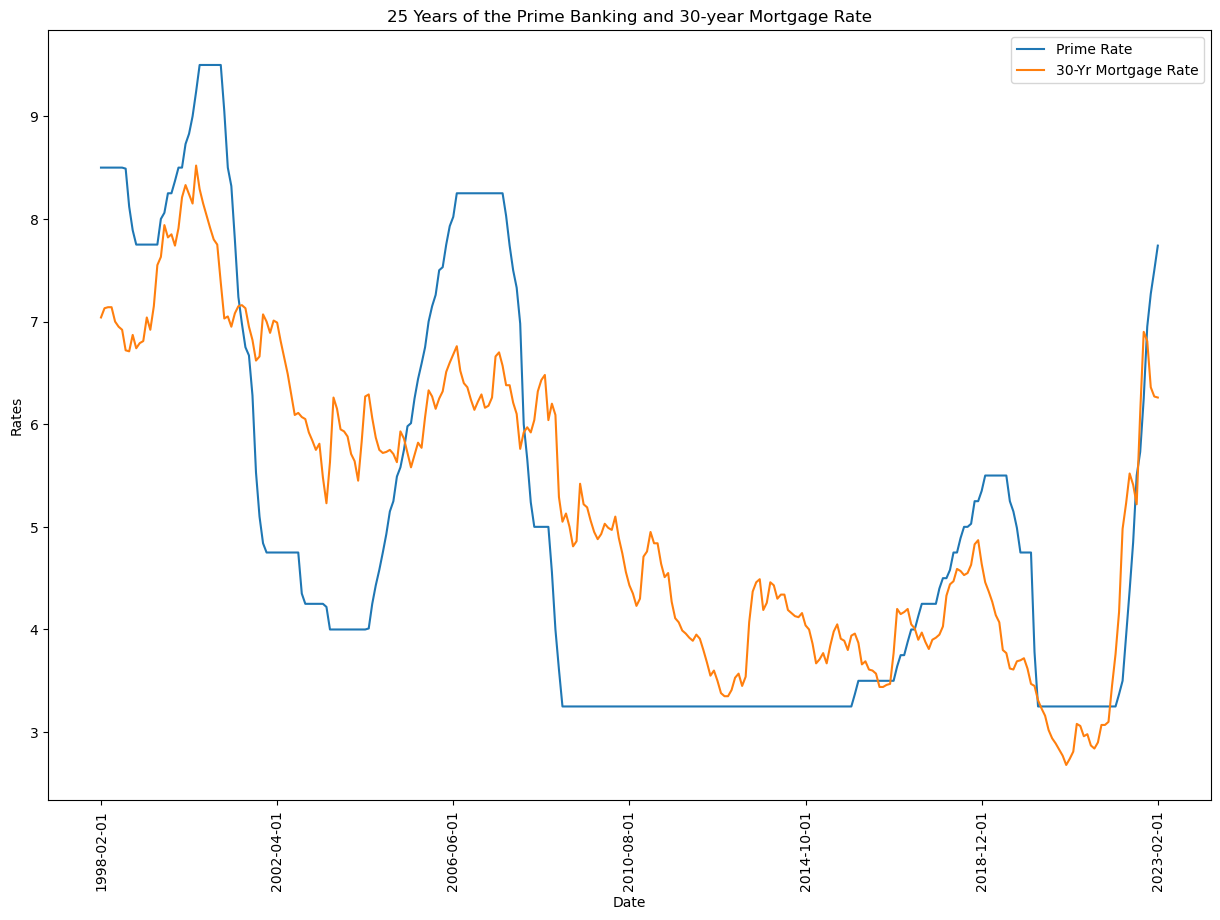

In [ ]:
#convert columns into 
_25_year_df=_25year_df.astype(float)
#create line plots with both 25 year series
_25_line_plot=_25_year_df.plot(rot=90,
                xlabel="Date",
                ylabel="Rates",
                title="25 Years of the Prime Banking and 30-year Mortgage Rate",
                              figsize = (15,10))
_25_line_plot.get_figure().savefig('25line.png', bbox_inches="tight", dpi=300)

The r-value is:0.6632493308968419


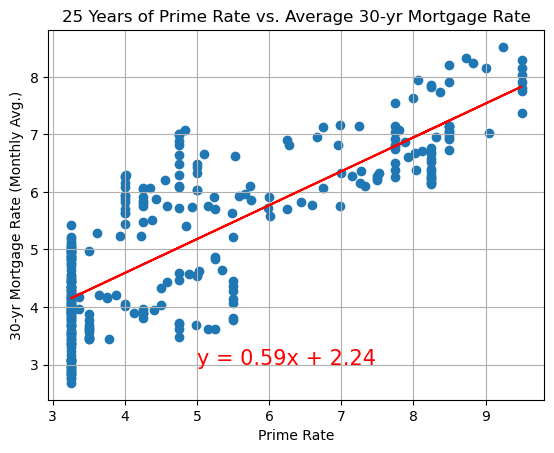

In [ ]:
#scatter plot to for 25 year correlation
#convert data to float
x_raw=_25year_df["Prime Rate"]
x_val=x_raw.astype(float)
y_raw=_25year_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
prime_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,prime_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Prime Rate")
plt.ylabel("30-yr Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("25 Years of Prime Rate vs. Average 30-yr Mortgage Rate")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("25yrprimev30yr.png")

# 5 - Year Prime and Mortgage Rate Visualization

The r-value is:0.6690170012485033


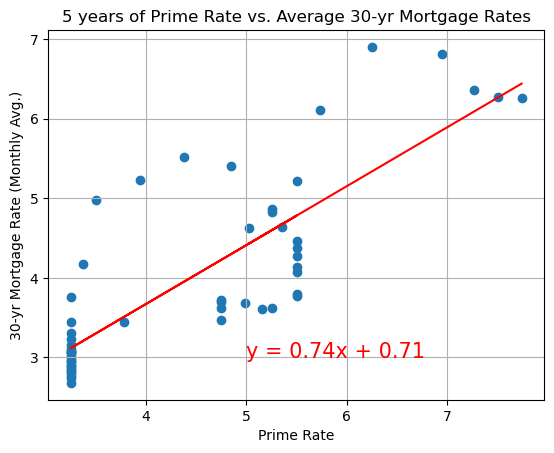

In [ ]:
#scatter plot to determine correlation of 5 - year mortgage and prime rates
#convert data to float
x_raw=prime_virt_df["Prime Rate"]
x_val=x_raw.astype(float)
y_raw=M30_virt_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
prime_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,prime_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Prime Rate")
plt.ylabel("30-yr Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("5 years of Prime Rate vs. Average 30-yr Mortgage Rates")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("primev30yr.png")

In [ ]:
#combine vertical prime and 30 year Mortgage dataframes for plotting
combine_virt_df=pd.merge(prime_virt_df,M30_virt_df,left_on="Dates", right_on="Dates")
#ensure data is numerical for plotting
_5year_df=combine_virt_df.astype(float)
_5year_df.head()

,Prime Rate,30-Yr Mortgage Rate
Dates,,
2018-09-01,5.03,4.63
2018-10-01,5.25,4.83
2018-11-01,5.25,4.87
2018-12-01,5.35,4.64
2019-01-01,5.50,4.46


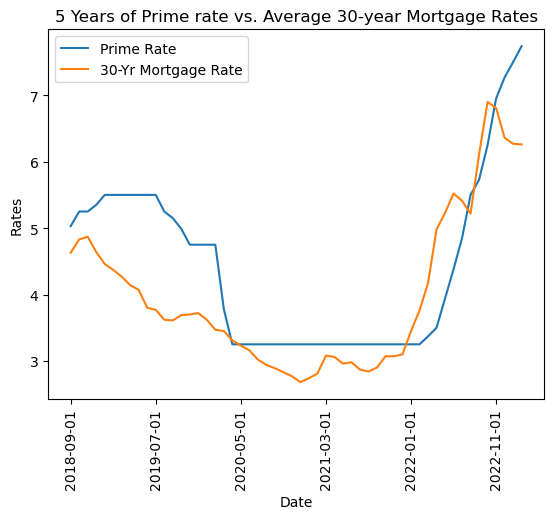

In [ ]:
_5year_line=_5year_df.plot(rot=90,
                xlabel="Date",
                ylabel="Rates",
                title="5 Years of Prime rate vs. Average 30-year Mortgage Rates")
_5year_line.get_figure().savefig('5line.png', bbox_inches="tight", dpi=300)

# Median List Price vs Mortgage Rates Visualization and Analysis

In [ ]:
#set SizeRank to index
lr_median_list_price = lr_median_list_price.set_index('SizeRank')

In [ ]:
# Set US to index for US comparison graph
lr_median_list_price_us = lr_median_list_price.set_index('RegionName')
lr_median_list_price_us.head()

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,287967.0,294567.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [2]:
# Import average mortgage rate data from group data folder
lr_mortgage_rate_to_load = 'data/cp_average_mortgage_rate.csv'
average_mortgage_rate = pd.read_csv(lr_mortgage_rate_to_load)
average_mortgage_rate.head()

,Year,Month,Average Rate
0,2018,8,4.5500
1,2018,9,4.6275
2,2018,10,4.8300
3,2018,11,4.8660
4,2018,12,4.6375


In [3]:
# Linear regression on US Average Mortgage Rate vs US Average Home List Price
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)
us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_average_home_list, us_average_mortgage)
regress_values = us_average_home_list * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(us_average_home_list,us_average_mortgage)
plt.plot(us_average_home_list,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Average US Home List Price')
plt.ylabel('30-yr Mortgage Rate (Monthly Avg.)')
plt.annotate(line_eq,(300000,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

NameError: name 'lr_median_list_price_us' is not defined

Analysis:

In [4]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot

# set x and y values
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)

us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)

years = lr_median_list_price_us.keys()
years_2 = pd.to_datetime(years)

# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

list_price_plot, = ax.plot(years_2, us_average_home_list, color="blue", label="US Average Home List Price" )
mortgage_plot, = twin1.plot(years_2, us_average_mortgage, color='green', label="30-yr Mortgage Rate (Monthly Avg.)")

# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=list_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)

ax.yaxis.label.set_color(list_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())

#set labels
ax.set_xlabel('Year')
ax.set_ylabel('US Average Home List Price')
twin1.set_ylabel('30-yr Mortgage Rate (Monthly Avg.)')

# set legend
ax.legend(handles = [list_price_plot, mortgage_plot])

# show plot
plt.show()

NameError: name 'lr_median_list_price_us' is not defined

Analysis:

In [5]:
#CHELSEA median sales prive vs average mortgage rate scatter plot + linear regression 
#set x, y values 
x_val=cp_median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)
y_val=average_mortgage_rate['Average Rate']
y_value=y_val.astype(float)

#plot data

plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_avg_morg_rate=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_avg_morg_rate,"r-")
plt.annotate(line_eq,(250000,6),fontsize=15,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
print(f'The r-value is:{rvalue*rvalue}')
#plt.savefig("MortgageRatevsMedianPrice.png")

NameError: name 'cp_median_sale_price_cleaned' is not defined

Analysis


In [ ]:
# CHELSEA median sales prive vs average mortgage rate scatter plot + polynomial regression 
#set x & y values 
x_val=median_sale_price_cleaned.loc['United States']
y_val=average_mortgage_rate['Average Rate']

#polynomial regression equation
poly_reg = numpy.poly1d(numpy.polyfit(x_val, y_val, 3))
poly_line = numpy.linspace(225000, 375000, 100)

plt.scatter(x_val, y_val)
plt.plot(poly_line, poly_reg(poly_line))
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
plt.savefig("MortgageRatevsMedianPricePolynomial.png")
plt.show()
print(f'The r-value is: {r2_score(y_val, poly_reg(x_val))}')


Analysis

In [ ]:
#CHELSEA plot median us sales price and average mortgage rate multi-line plot
#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

average_mortgage_rate_us = average_mortgage_rate['Average Rate']
average_mortgage_rate_us = average_mortgage_rate_us.astype(float)

date = median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
mortgage_rate_plot, = twin1.plot(date_2, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Average Mortgage Rates US")

#set legend
ax.legend(handles = [sales_price_plot, mortgage_rate_plot])

# Save the figure
plt.savefig("AverageSalesPrice_AverageMortgageRate.png")

#show plot
plt.show()


Analysis

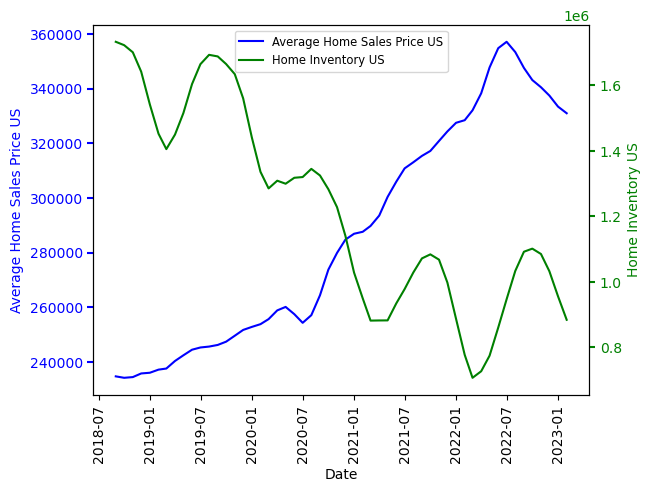

In [21]:
#CHELSEA plot median us sales price and home inventory multi-line plot
#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

home_inventory_us = bc_inventory_cleaned.loc['United States']
home_inventory_us = home_inventory_us.astype(float)

date = cp_median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
inventory_plot, = twin1.plot(date_2, home_inventory_us, color="green", label="Home Inventory US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(inventory_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Home Inventory US")

#set legend
ax.legend(handles = [sales_price_plot, inventory_plot], loc='upper center', fontsize='small')

# Save the figure
plt.savefig("AverageSalesPrice_HomeInventory.png")

#show plot
plt.show()


Analysis

The r-value is:0.7528325888827002


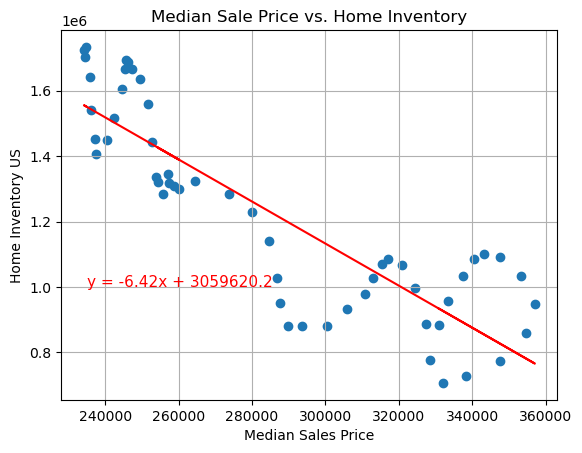

In [22]:
#CHELSEA scatter plot + linear regression median sales price + home inventory
#set x, y values
x_val=cp_median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)

y_val=bc_inventory_cleaned.loc['United States']
y_value=y_val.astype(float)

#plot data, linear reg line + equation,print r value
plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_home_inventory=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_home_inventory,"r-")
plt.annotate(line_eq,(235000,1e6),fontsize=11,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Home Inventory US")
plt.grid()
plt.title("Median Sale Price vs. Home Inventory")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("MedianSalePricevsInventoryScatter.png")

Analysis